In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy import stats
from pprint import pprint


In [2]:
weatherDisasterCSV = "Resources/disaster_data.csv"
coordCSV = "output_data/NEW_coordinates.csv"
wDisaster_df = pd.read_csv(weatherDisasterCSV)
desiredColumns = ["Dis No", "Year", "Seq", "Disaster Subgroup", "Disaster Type", "Disaster Subtype", "Disaster Subsubtype", "Entry Criteria", "ISO", "Location", "Start Month", "End Month", "Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)", "CPI"]
wDisaster_df = wDisaster_df.loc[wDisaster_df["ISO"] == "USA", desiredColumns]
wDisaster_df
pd.options.display.max_rows = 10

In [3]:
wDisaster_df

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Entry Criteria,ISO,Location,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
2,2000-0080-USA,2000,80,Hydrological,Flood,Riverine flood,NaN,Affect,USA,"Kentucky, Ohio provinces",2,2.0,3.0,NaN,231.0,NaN,231.0,NaN,NaN,67.355759
3,2000-0500-USA,2000,500,Hydrological,Flood,Riverine flood,NaN,Affect,USA,"Morris, Sussex districts (New Jersey province)",8,8.0,NaN,NaN,175.0,NaN,175.0,NaN,166000.0,67.355759
4,2000-0919-USA,2000,919,Meteorological,Storm,NaN,NaN,SigDam,USA,"Alabama, Georgia, Louisiana, North Carolina, S...",1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
5,2000-9712-USA,2000,9712,Climatological,Drought,Drought,NaN,Affected,USA,Wyoming province,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.355759
6,2000-0838-USA,2000,838,Meteorological,Storm,Convective storm,Winter storm/Blizzard,Kill,USA,"Texas, Oklahoma, New Mexico, Arkansas, Missour...",12,12.0,57.0,34.0,NaN,NaN,34.0,200500.0,10000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2019-0307-USA,2019,307,Hydrological,Flood,NaN,NaN,Affected,USA,"Lincolnton region (Lincoln County, North Carol...",6,6.0,3.0,NaN,600.0,NaN,600.0,NaN,NaN,100.000000
533,2020-0148-USA,2020,148,Meteorological,Storm,Convective storm,Tornado,Kill,USA,"Louisiana, Texas, Mississippi, South Carolina,...",4,4.0,38.0,200.0,NaN,NaN,200.0,NaN,1000000.0,NaN
534,2020-0011-USA,2020,11,Meteorological,Storm,Convective storm,Severe storm,Kill,USA,"Texas, Oklahoma, Missouri, Arkansas, Louisiana...",1,1.0,12.0,NaN,NaN,NaN,NaN,NaN,1200000.0,NaN
535,2020-0082-USA,2020,82,Meteorological,Storm,Convective storm,Tornado,Waiting,USA,"Nashville (Tennessee), Kentucky, Missouri, Mis...",3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN


In [4]:
newData = {
    "Location": [],
    "Dis No": []
}

for index, row in wDisaster_df.iterrows():
    #print(type(newData["Location"]))
    if type(row["Location"]) is str:
        for location in row["Location"].split(","):
            newData["Location"].append(location)
            newData["Dis No"].append(row["Dis No"])
splitLocations_df = pd.DataFrame(newData)
splitLocations_df["Location"].value_counts()

 Missouri                                    80
 Kansas                                      77
 Oklahoma                                    60
 Indiana                                     59
 Ohio                                        58
                                             ..
Daytona beach (Volusia district               1
Antigo area (Langlade district                1
 Muncie in Delaware                           1
 Stewart                                      1
 Montgomery districts (Kentucky province)     1
Name: Location, Length: 1415, dtype: int64

In [5]:
print(wDisaster_df.columns)
wDisaster_df.groupby("Disaster Type").count()

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Disaster Subsubtype', 'Entry Criteria', 'ISO',
       'Location', 'Start Month', 'End Month', 'Total Deaths', 'No Injured',
       'No Affected', 'No Homeless', 'Total Affected',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI'],
      dtype='object')


,Dis No,Year,Seq,Disaster Subgroup,Disaster Subtype,Disaster Subsubtype,Entry Criteria,ISO,Location,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
Disaster Type,,,,,,,,,,,,,,,,,,,
Drought,11,11,11,11,11,0,11,11,11,11,8,0,0,0,0,0,3,9,11
Earthquake,9,9,9,9,9,0,9,9,9,9,9,3,7,7,2,9,4,8,9
Epidemic,3,3,3,3,2,0,3,3,2,3,3,1,0,3,0,3,0,0,3
Extreme temperature,13,13,13,13,13,2,13,13,13,13,13,12,1,0,0,1,3,3,13
Flood,94,94,94,94,79,0,93,94,94,94,94,70,7,69,5,73,22,54,94
Landslide,3,3,3,3,3,0,3,3,3,3,3,3,2,1,1,3,0,2,3
Storm,278,278,278,278,258,203,278,278,278,278,278,238,102,86,29,155,175,224,274
Volcanic activity,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,1
Wildfire,62,62,62,62,52,0,62,62,62,62,62,32,22,26,40,54,17,42,62


In [6]:
splitLocations_df["Lat"] = ""
splitLocations_df["Long"] = ""
locations = splitLocations_df["Location"]
splitLocations_df

,Location,Dis No,Lat,Long
0,Kentucky,2000-0080-USA,,
1,Ohio provinces,2000-0080-USA,,
2,Morris,2000-0500-USA,,
3,Sussex districts (New Jersey province),2000-0500-USA,,
4,Alabama,2000-0919-USA,,
...,...,...,...,...
4019,Georgia,2020-0082-USA,,
4020,Texas,2020-0082-USA,,
4021,errebonne,2020-0219-USA,,
4022,Plaquemines,2020-0219-USA,,


In [7]:
coordLocations_df = pd.read_csv(coordCSV)
coordLocations_df = coordLocations_df.loc[:, ["Location", "Dis No", "Lat", "Long"]]
coordLocations_df

,Location,Dis No,Lat,Long
0,Kentucky,2000-0080-USA,34.61,-92.66
1,Morris,2000-0500-USA,40.83,-74.53
2,Alabama,2000-0919-USA,32.75,-86.75
3,Georgia,2000-0919-USA,32.75,-83.50
4,Louisiana,2000-0919-USA,31.00,-92.00
...,...,...,...,...
2856,Kentucky,2020-0082-USA,34.61,-92.66
2857,Missouri,2020-0082-USA,38.25,-92.50
2858,Mississippi,2020-0082-USA,32.75,-89.75
2859,Georgia,2020-0082-USA,32.75,-83.50


In [8]:
combinedData = pd.merge(coordLocations_df, wDisaster_df, on="Dis No", how="outer")
combinedData = combinedData.iloc[range(0,2861), :].rename(columns={"Location_x": "Location"})
combinedData

,Location,Dis No,Lat,Long,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,Kentucky,2000-0080-USA,34.61,-92.66,2000,80,Hydrological,Flood,Riverine flood,NaN,...,2,2.0,3.0,NaN,231.0,NaN,231.0,NaN,NaN,67.355759
1,Morris,2000-0500-USA,40.83,-74.53,2000,500,Hydrological,Flood,Riverine flood,NaN,...,8,8.0,NaN,NaN,175.0,NaN,175.0,NaN,166000.0,67.355759
2,Alabama,2000-0919-USA,32.75,-86.75,2000,919,Meteorological,Storm,NaN,NaN,...,1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
3,Georgia,2000-0919-USA,32.75,-83.50,2000,919,Meteorological,Storm,NaN,NaN,...,1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
4,Louisiana,2000-0919-USA,31.00,-92.00,2000,919,Meteorological,Storm,NaN,NaN,...,1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,Kentucky,2020-0082-USA,34.61,-92.66,2020,82,Meteorological,Storm,Convective storm,Tornado,...,3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN
2857,Missouri,2020-0082-USA,38.25,-92.50,2020,82,Meteorological,Storm,Convective storm,Tornado,...,3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN
2858,Mississippi,2020-0082-USA,32.75,-89.75,2020,82,Meteorological,Storm,Convective storm,Tornado,...,3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN
2859,Georgia,2020-0082-USA,32.75,-83.50,2020,82,Meteorological,Storm,Convective storm,Tornado,...,3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN


In [9]:
FourthQuintant = combinedData.loc[(combinedData["Lat"] < 40) & (combinedData["Long"] < -105), :]
areasAffected = len(FourthQuintant["Location"].unique())

FourthQuintant

,Location,Dis No,Lat,Long,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
13,New Mexico,2000-0838-USA,34.50,-106.00,2000,838,Meteorological,Storm,Convective storm,Winter storm/Blizzard,...,12,12.0,57.0,34.0,NaN,NaN,34.0,200500.0,10000.0,67.355759
59,Los Alamos,2000-0240-USA,35.89,-106.31,2000,240,Climatological,Wildfire,Forest fire,NaN,...,5,9.0,NaN,NaN,25000.0,400.0,25400.0,200500.0,1500000.0,67.355759
63,Arizona,2000-0465-USA,34.50,-111.50,2000,465,Climatological,Wildfire,Forest fire,NaN,...,7,8.0,14.0,NaN,1000.0,NaN,1000.0,NaN,1000000.0,67.355759
65,Colorado,2000-0465-USA,39.00,-105.50,2000,465,Climatological,Wildfire,Forest fire,NaN,...,7,8.0,14.0,NaN,1000.0,NaN,1000.0,NaN,1000000.0,67.355759
68,Nevada,2000-0465-USA,39.25,-116.75,2000,465,Climatological,Wildfire,Forest fire,NaN,...,7,8.0,14.0,NaN,1000.0,NaN,1000.0,NaN,1000000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,Sonoma,2019-0086-USA,38.29,-122.46,2019,86,Hydrological,Flood,NaN,NaN,...,2,3.0,1.0,NaN,6000.0,NaN,6000.0,NaN,NaN,100.000000
2814,Colorado,2019-0007-USA,39.00,-105.50,2019,7,Meteorological,Storm,Convective storm,Winter storm/Blizzard,...,1,1.0,13.0,57.0,NaN,NaN,57.0,NaN,NaN,100.000000
2835,Los Angeles,2019-0517-USA,34.05,-118.24,2019,517,Climatological,Wildfire,Forest fire,NaN,...,10,10.0,NaN,2.0,660.0,NaN,662.0,800000.0,1300000.0,100.000000
2836,San Bernardino,2019-0517-USA,34.11,-117.29,2019,517,Climatological,Wildfire,Forest fire,NaN,...,10,10.0,NaN,2.0,660.0,NaN,662.0,800000.0,1300000.0,100.000000


In [10]:
#Creating a trimmed DF of dropped duplicates for more accurate calculations
uniqueDisNo_df = FourthQuintant.drop_duplicates(subset="Dis No", keep="first")
#My regions unique DF for plotting
uniqueFourthQuintant = uniqueDisNo_df.loc[(uniqueDisNo_df["Lat"] < 40) & (uniqueDisNo_df["Long"] < -105), :]

uniqueFourthQuintant

,Location,Dis No,Lat,Long,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
13,New Mexico,2000-0838-USA,34.50,-106.00,2000,838,Meteorological,Storm,Convective storm,Winter storm/Blizzard,...,12,12.0,57.0,34.0,NaN,NaN,34.0,200500.0,10000.0,67.355759
59,Los Alamos,2000-0240-USA,35.89,-106.31,2000,240,Climatological,Wildfire,Forest fire,NaN,...,5,9.0,NaN,NaN,25000.0,400.0,25400.0,200500.0,1500000.0,67.355759
63,Arizona,2000-0465-USA,34.50,-111.50,2000,465,Climatological,Wildfire,Forest fire,NaN,...,7,8.0,14.0,NaN,1000.0,NaN,1000.0,NaN,1000000.0,67.355759
92,Smith,2001-0145-USA,38.80,-119.33,2001,145,Meteorological,Storm,Convective storm,Tornado,...,4,4.0,4.0,18.0,765.0,30.0,813.0,NaN,23000.0,69.259340
144,Barstow,2001-0262-USA,34.90,-117.02,2001,262,Hydrological,Flood,Riverine flood,NaN,...,2,3.0,NaN,NaN,200.0,NaN,200.0,NaN,NaN,69.259340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,Colorado,2018-0046-USA,39.00,-105.50,2018,46,Meteorological,Storm,Convective storm,Winter storm/Blizzard,...,1,1.0,10.0,NaN,NaN,NaN,NaN,NaN,50000.0,98.219991
2773,Thousand Oaks,2018-0468-USA,34.17,-118.84,2018,468,Climatological,Wildfire,NaN,NaN,...,11,11.0,2.0,3.0,NaN,NaN,3.0,4000000.0,5200000.0,98.219991
2783,Sonoma,2019-0086-USA,38.29,-122.46,2019,86,Hydrological,Flood,NaN,NaN,...,2,3.0,1.0,NaN,6000.0,NaN,6000.0,NaN,NaN,100.000000
2814,Colorado,2019-0007-USA,39.00,-105.50,2019,7,Meteorological,Storm,Convective storm,Winter storm/Blizzard,...,1,1.0,13.0,57.0,NaN,NaN,57.0,NaN,NaN,100.000000


In [11]:
#Distaster subtypes value counts into variables to use in the future 
regionDisTypesCount = uniqueFourthQuintant["Disaster Type"].value_counts()
regionDisSubTypeCount = uniqueFourthQuintant["Disaster Subtype"].value_counts()


In [12]:
#Print summary of total disaster count and areas affected
totalDisasterCount = len(uniqueFourthQuintant['Disaster Subtype'])
print(f"There were {totalDisasterCount} total distaters in the Southwest Region\nThere {areasAffected} total areas affected")

There were 99 total distaters in the Southwest Region
There 63 total areas affected


In [13]:
#DF for Occurances of Disaster SubTypes plot
regionalDisGroupby = uniqueFourthQuintant.groupby(["Disaster Type", "Disaster Subtype"]).agg({"Location": "count", "Total Damages ('000 US$)" : "sum"})


In [14]:
regionalDisGroupby

Location  \
Disaster Type       Disaster Subtype                             
Drought             Drought                                  3   
Earthquake          Ground movement                          1   
Epidemic            Viral disease                            1   
Extreme temperature Heat wave                                1   
Flood               Flash flood                              2   
...                                                        ...   
Storm               Extra-tropical storm                     1   
                    Tropical cyclone                         4   
Volcanic activity   Lava flow                                1   
Wildfire            Forest fire                             12   
                    Land fire (Brush, Bush, Pasture)         5   

                                                      Total Damages ('000 US$)  
Disaster Type       Disaster Subtype                                            
Drought             Drought                                         29800000.0  
Earthquake          Ground movement                                   200000.0  
Epidemic            Viral disease                                          0.0  
Extreme temperature Heat wave                                              0.0  
Flood               Flash flood                                      2790000.0  
...                                                                        ...  
Storm               Extra-tropical storm                             1000000.0  
                    Tropical cyclone                               152260000.0  
Volcanic activity   Lava flow                                         500000.0  
Wildfire            Forest fire                                      5050000.0  
                    Land fire (Brush, Bush, Pasture)                16925000.0  

[12 rows x 2 columns]

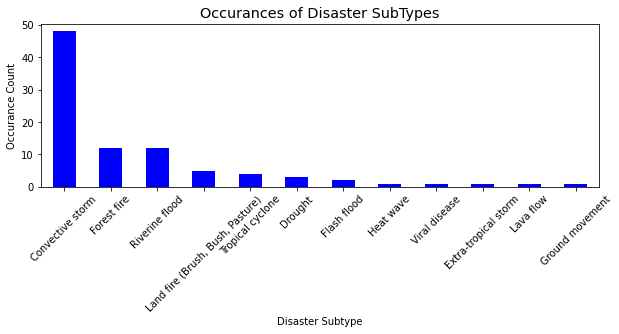

In [15]:
plt.figure(figsize=(10,3))

regionDisSubTypeCount.plot(kind="bar", facecolor="blue", rot=45)
plt.style.use('ggplot')
plt.title("Occurances of Disaster SubTypes")
plt.xlabel("Disaster Subtype")
plt.ylabel("Occurance Count")
plt.savefig("output-graphs_sw_disasters_occurances.png")

<Figure size 720x720 with 0 Axes>

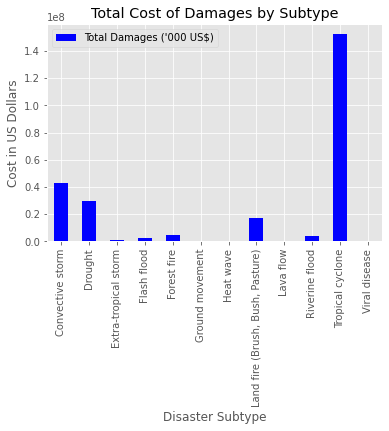

In [16]:
#Total damages by subtype
regionalDisGroupby1 = uniqueFourthQuintant.groupby("Disaster Subtype").agg({"Location": "count", "Total Damages ('000 US$)" : "sum"})

plt.figure(figsize=(10,10))

regionalDisGroupby1.plot(kind="bar", facecolor="blue", y="Total Damages ('000 US$)", rot=90)
plt.title("Total Cost of Damages by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Cost in US Dollars")
plt.savefig("output-graphs_sw_disasters_subtypes.png")

In [17]:

def isNaN(num):
    return num != num

damage_types = [["Total Deaths"], ["No Injured"], ["No Affected"], ["No Homeless"], ["Total Affected"], ["Insured Damages ('000 US$)"], ["Total Damages ('000 US$)"]];

disaster_type = uniqueFourthQuintant["Disaster Type"].unique()

damages = [];
for damage_type in damage_types:
    causalties = [];
    for disaster in disaster_type:
        costs = [];
        raw_data = uniqueFourthQuintant.loc[uniqueFourthQuintant["Disaster Type"] == disaster,damage_type[0]]
        for cost in raw_data:
            if isNaN(cost) == 0:
                costs.append(cost)
        causalties.append(costs)
    damages.append(causalties)

damages


[[[57.0,
   4.0,
   36.0,
   18.0,
   13.0,
   4.0,
   45.0,
   5.0,
   12.0,
   3.0,
   12.0,
   22.0,
   2.0,
   12.0,
   1.0,
   20.0,
   39.0,
   6.0,
   10.0,
   9.0,
   9.0,
   29.0,
   6.0,
   14.0,
   3.0,
   3.0,
   27.0,
   4.0,
   40.0,
   9.0,
   12.0,
   3.0,
   4.0,
   45.0,
   6.0,
   2.0,
   9.0,
   22.0,
   3.0,
   5.0,
   88.0,
   58.0,
   2.0,
   10.0,
   13.0],
  [14.0, 14.0, 4.0, 8.0, 2.0, 2.0, 4.0, 1.0, 2.0, 30.0, 2.0, 14.0, 2.0],
  [28.0, 3.0, 11.0, 1.0, 26.0, 2.0, 9.0, 9.0, 32.0, 5.0, 1.0],
  [],
  [2.0],
  [33.0],
  [],
  []],
 [[34.0,
   18.0,
   115.0,
   4.0,
   145.0,
   37.0,
   20.0,
   40.0,
   27.0,
   2.0,
   1.0,
   450.0,
   100.0,
   18.0,
   150.0,
   15.0,
   60.0,
   10.0,
   12.0,
   24.0,
   8.0,
   57.0],
  [104.0, 1.0, 64.0, 20.0, 185.0, 2.0, 3.0, 2.0],
  [8.0, 40.0],
  [],
  [40.0],
  [31.0],
  [],
  []],
 [[765.0,
   3600.0,
   6000.0,
   150.0,
   17000.0,
   1089.0,
   170000.0,
   300.0,
   200000.0,
   555000.0],
  [25000.0,
   1000.0,


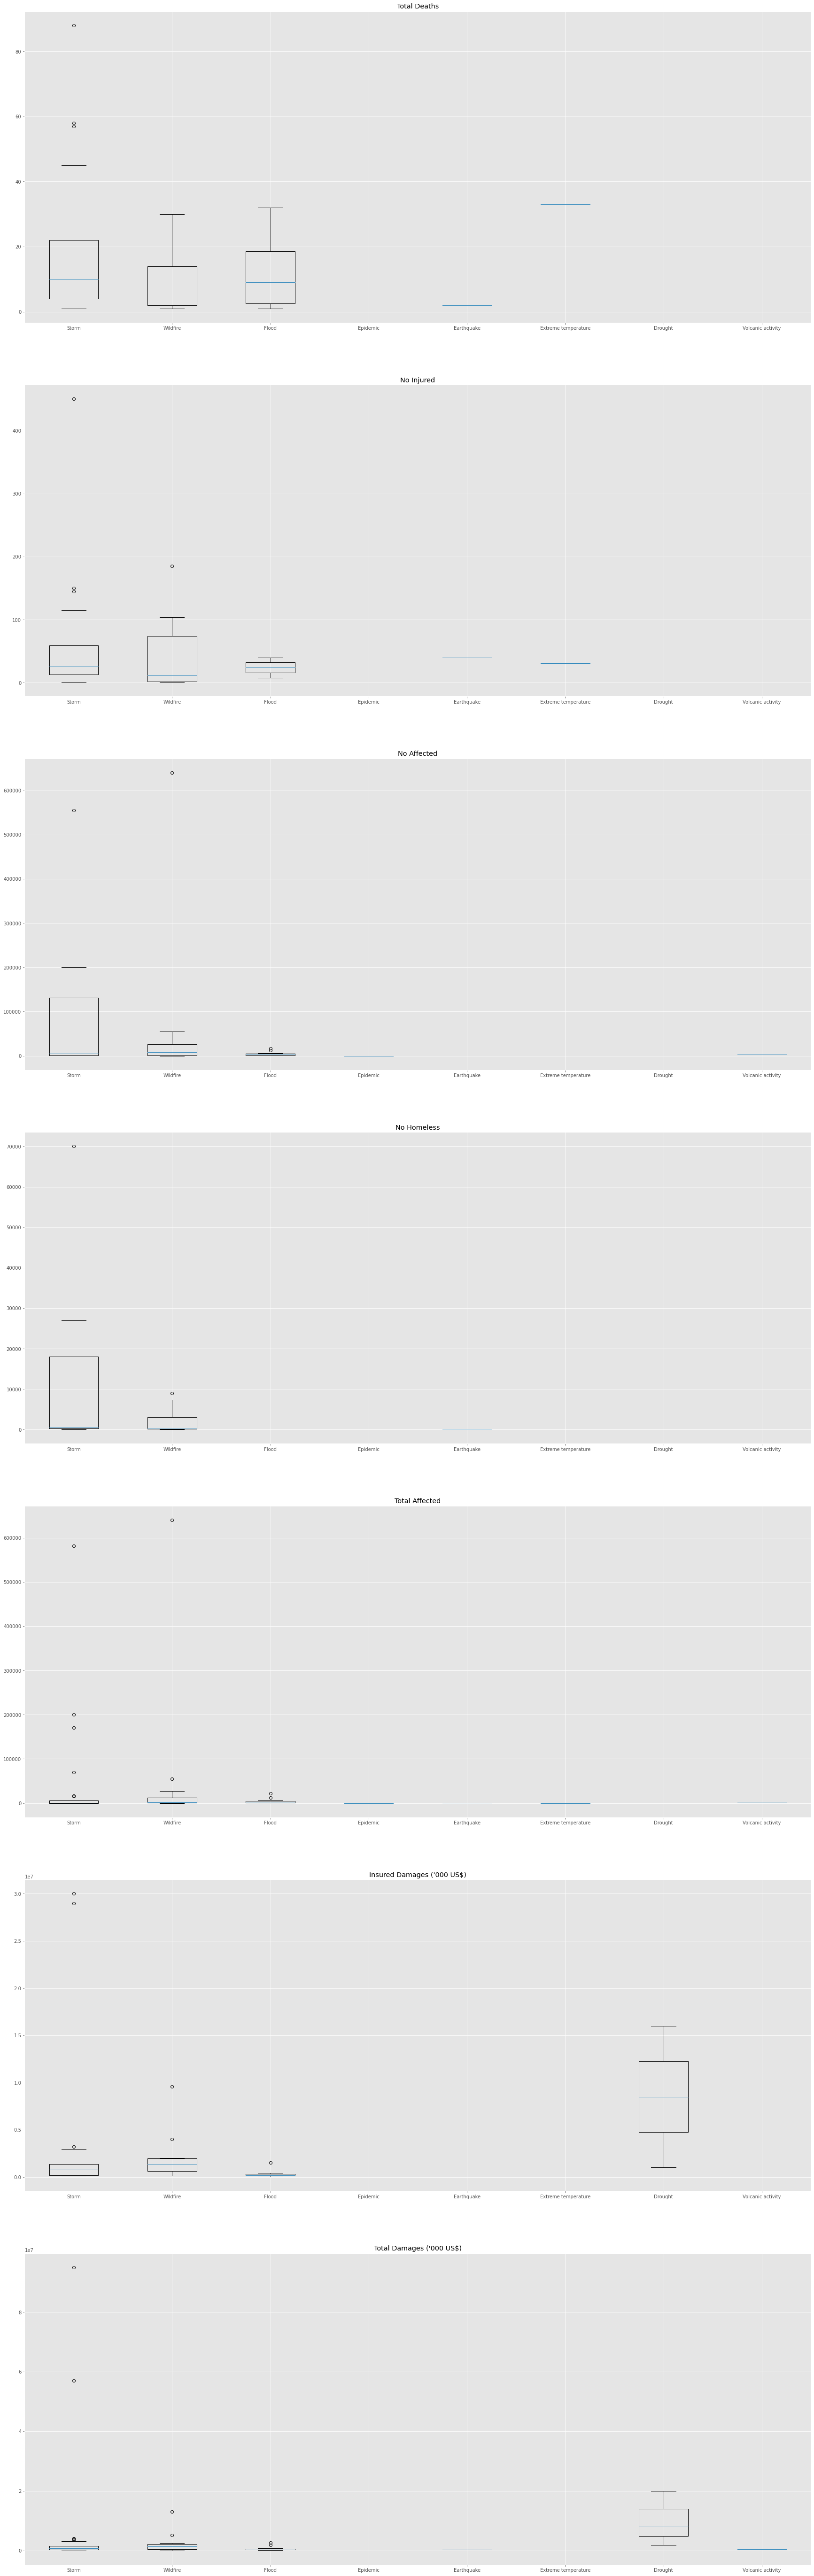

In [20]:
# Create a figure instance

fig, ax = plt.subplots(7,1)
fig.set_size_inches(30, 100, forward=True)

i = 0;

for damage_type in damage_types:
    ax[i].set_title(damage_type[0])
    ax[i].set_xticklabels(disaster_type)
    ax[i].boxplot(damages[i])
    
    i = i+1;
    
    # Save the figure
    fig.savefig('output-graphs_sw_disasters_boxplots.png', bbox_inches='tight')
    
    

In [21]:
yearly_TotalsRaw = uniqueFourthQuintant.groupby("Year").sum()
desiredColumns = ["Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)"]
yearly_Totals = yearly_TotalsRaw.loc[:, desiredColumns].reset_index(drop=False)
yearly_Totals

,Year,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$)
0,2000,71.0,34.0,26000.0,400.0,26434.0,401000.0,2510000.0
1,2001,4.0,18.0,965.0,30.0,1013.0,0.0,23000.0
2,2002,67.0,115.0,5629.0,564.0,6308.0,450500.0,700000.0
3,2003,65.0,293.0,27000.0,15120.0,42413.0,5222000.0,4250000.0
4,2004,5.0,37.0,25929.0,408.0,26374.0,800000.0,1100000.0
...,...,...,...,...,...,...,...,...
15,2015,92.0,60.0,12600.0,7431.0,20091.0,4510000.0,9952000.0
16,2016,35.0,22.0,420.0,0.0,442.0,1665000.0,2375000.0
17,2017,186.0,219.0,755009.0,109108.0,864336.0,74500000.0,173860000.0
18,2018,33.0,3.0,2500.0,3237.0,5740.0,4000000.0,7300000.0


In [22]:
Test = uniqueFourthQuintant.groupby('Year')['Disaster Subtype'].value_counts()
Test

Year  Disaster Subtype
2000  Forest fire         2
      Convective storm    1
2001  Convective storm    1
      Forest fire         1
      Riverine flood      1
                         ..
2018  Forest fire         1
      Lava flow           1
      Riverine flood      1
2019  Convective storm    1
      Forest fire         1
Name: Disaster Subtype, Length: 58, dtype: int64